In [315]:
# import various libraries which will be used for clustering 
#imported using 'as' for ease of coding
#numpy used for working with arrays
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

#import various sklearn subdirectories 
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as am
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

import seaborn as sns

In [316]:
# use mathplotlib to intialize the use of graphs
#graphs will now be placed within the notebook and directly under their corelated codeblock
%matplotlib inline
#set the size that graphs will appear as when they are generated
rcParams['figure.figsize'] = 7,4

In [317]:
#define the 'diab' variable as an inbuit data set called diabetes.
#this data set is built into the language and can be acsessed without a download.
#the diabetes data set has several columns, each containg diffrent data relating to a persons health
#these health metrics include bmi, blood pressure, age, sex and and blood sugar.
diab = datasets.load_diabetes()

#set the 'X' variable to a scale of the data set - in this case, the diabetes data
X = scale(diab.data)

#use datframe (from the pandas library) to set the y variable to the diabetes data
y = pd.DataFrame(diab.target)
variable_names = diab.feature_names

#set X to equal the first 10 columns of data in the dataset
X[0:10,]

array([[ 0.80050009,  1.06548848,  1.29708846,  0.45984057, -0.92974581,
        -0.73206462, -0.91245053, -0.05449919,  0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, -0.55350458, -0.17762425,
        -0.40288615,  1.56441355, -0.83030083, -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, -0.1192138 , -0.95867356,
        -0.71889748, -0.68024452, -0.05449919,  0.06015558, -0.54515416],
       [-1.87244107, -0.93853666, -0.24377122, -0.77064997,  0.25629203,
         0.52539714, -0.75764652,  0.72130245,  0.47698252, -0.19682291],
       [ 0.11317236, -0.93853666, -0.76494435,  0.45984057,  0.08272552,
         0.32789006,  0.17117751, -0.05449919, -0.67250161, -0.98056821],
       [-1.94881082, -0.93853666, -0.85558315, -0.40874099, -1.45044535,
        -1.66693147,  0.86779553, -1.60610247, -0.86567934, -2.02556194],
       [-0.9560041 ,  1.06548848, -0.99154136, -0.33635919, -0.84296255,
        -0.5213904 ,  0.0163735 , -0.83030083

In [318]:
# limit the OpenMP to 1 thread, which can be usefull for limit ineficiencies
# also adresses the moemory leak warning
import os
os.environ['OMP_NUM_THREADS'] = '1'


In [319]:
# define how many clusters (group), as well as setting the number of centroids and randomizing their positions
clustering = KMeans(n_clusters=3, random_state=5, n_init=10)
clustering.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=5)

In [320]:
#set the names of the columns to the below
diab_df = pd.DataFrame(diab.data)
diab_df.columns = ["age", "sex", "bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]
y.columns = ["Targets"]

Text(0.5, 1.0, 'K-Means Classification')

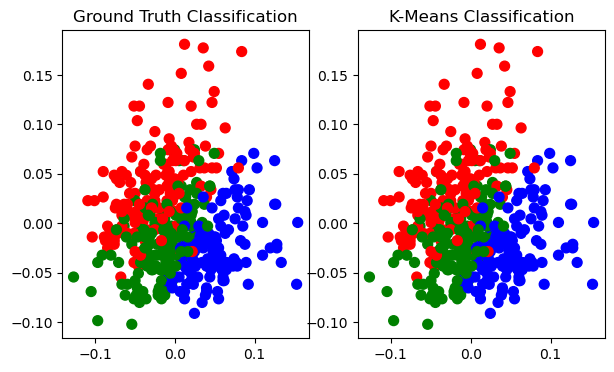

In [321]:
relabel = np.choose(clustering.labels_, [2,0,1]).astype(np.int64)

plt.subplot(1,2,1)

# define the colour theme - what clour the points of the three clusters will be
color_theme = np.array(['blue', 'green', 'red'])

# set s1 column (measures cholesterol) on x axsis and s3 colum (measures hdl) on y axsis
#this is done for both graphs, which are both defined below.
plt.scatter(x=diab_df.s1, y=diab_df.s3, c=color_theme[clustering.labels_], s=50)
plt.title("Ground Truth Classification")

plt.subplot(1,2,2)
plt.scatter(x=diab_df.s1, y=diab_df.s3, c=color_theme[clustering.labels_], s=50)
plt.title("K-Means Classification")